<a href="https://colab.research.google.com/github/aarush04/Diabetes-Detection/blob/main/Diabetes_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import sklearn
sklearn.__version__

'0.22.2.post1'

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn import metrics

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [ ]:
data = pd.read_csv('Diabetes_dataset.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.shape

(768, 9)

In [ ]:
copy_data = data.dropna(0)

In [ ]:
copy_data.shape

(768, 9)

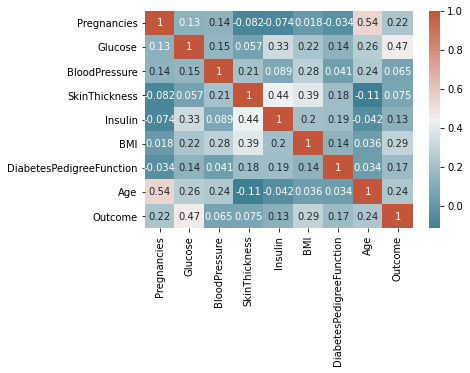

In [ ]:
corr = copy_data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [ ]:
mean = float(copy_data['BloodPressure'].mean())
copy_data["BloodPressure"] = np.where(copy_data["BloodPressure"] <25, mean,copy_data['BloodPressure'])

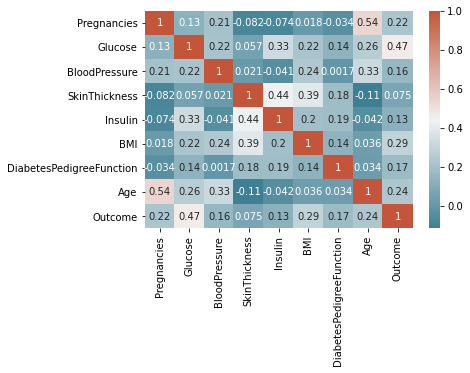

In [ ]:
corr = copy_data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

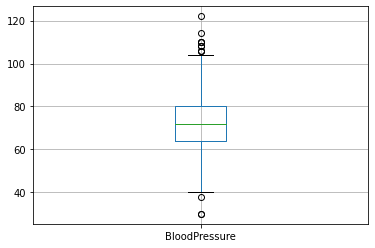

In [ ]:
copy_data.boxplot('BloodPressure')

In [ ]:
mean = float(copy_data['SkinThickness'].mean())
copy_data["SkinThickness"] = np.where(copy_data["SkinThickness"] <=0, mean,copy_data['SkinThickness'])

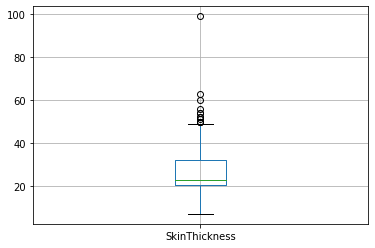

In [ ]:
copy_data.boxplot('SkinThickness')

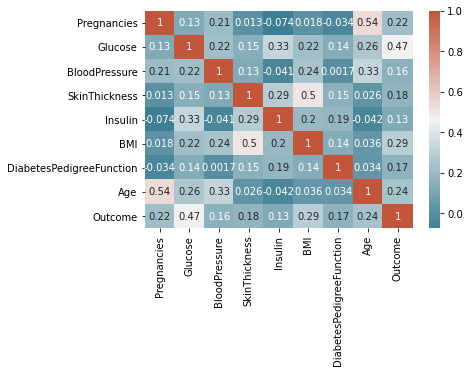

In [ ]:
corr = copy_data.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [ ]:
copy_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.000000,0,33.6,0.627,50,1
1,1,85,66.0,29.000000,0,26.6,0.351,31,0
2,8,183,64.0,20.536458,0,23.3,0.672,32,1
3,1,89,66.0,23.000000,94,28.1,0.167,21,0
4,0,137,40.0,35.000000,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,48.000000,180,32.9,0.171,63,0
764,2,122,70.0,27.000000,0,36.8,0.340,27,0
765,5,121,72.0,23.000000,112,26.2,0.245,30,0
766,1,126,60.0,20.536458,0,30.1,0.349,47,1


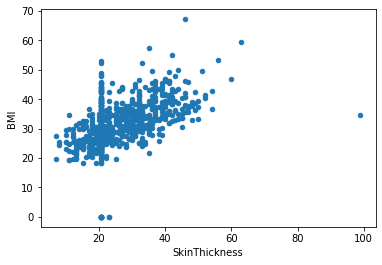

In [ ]:
copy_data.plot(kind='scatter', x='SkinThickness', y='BMI')

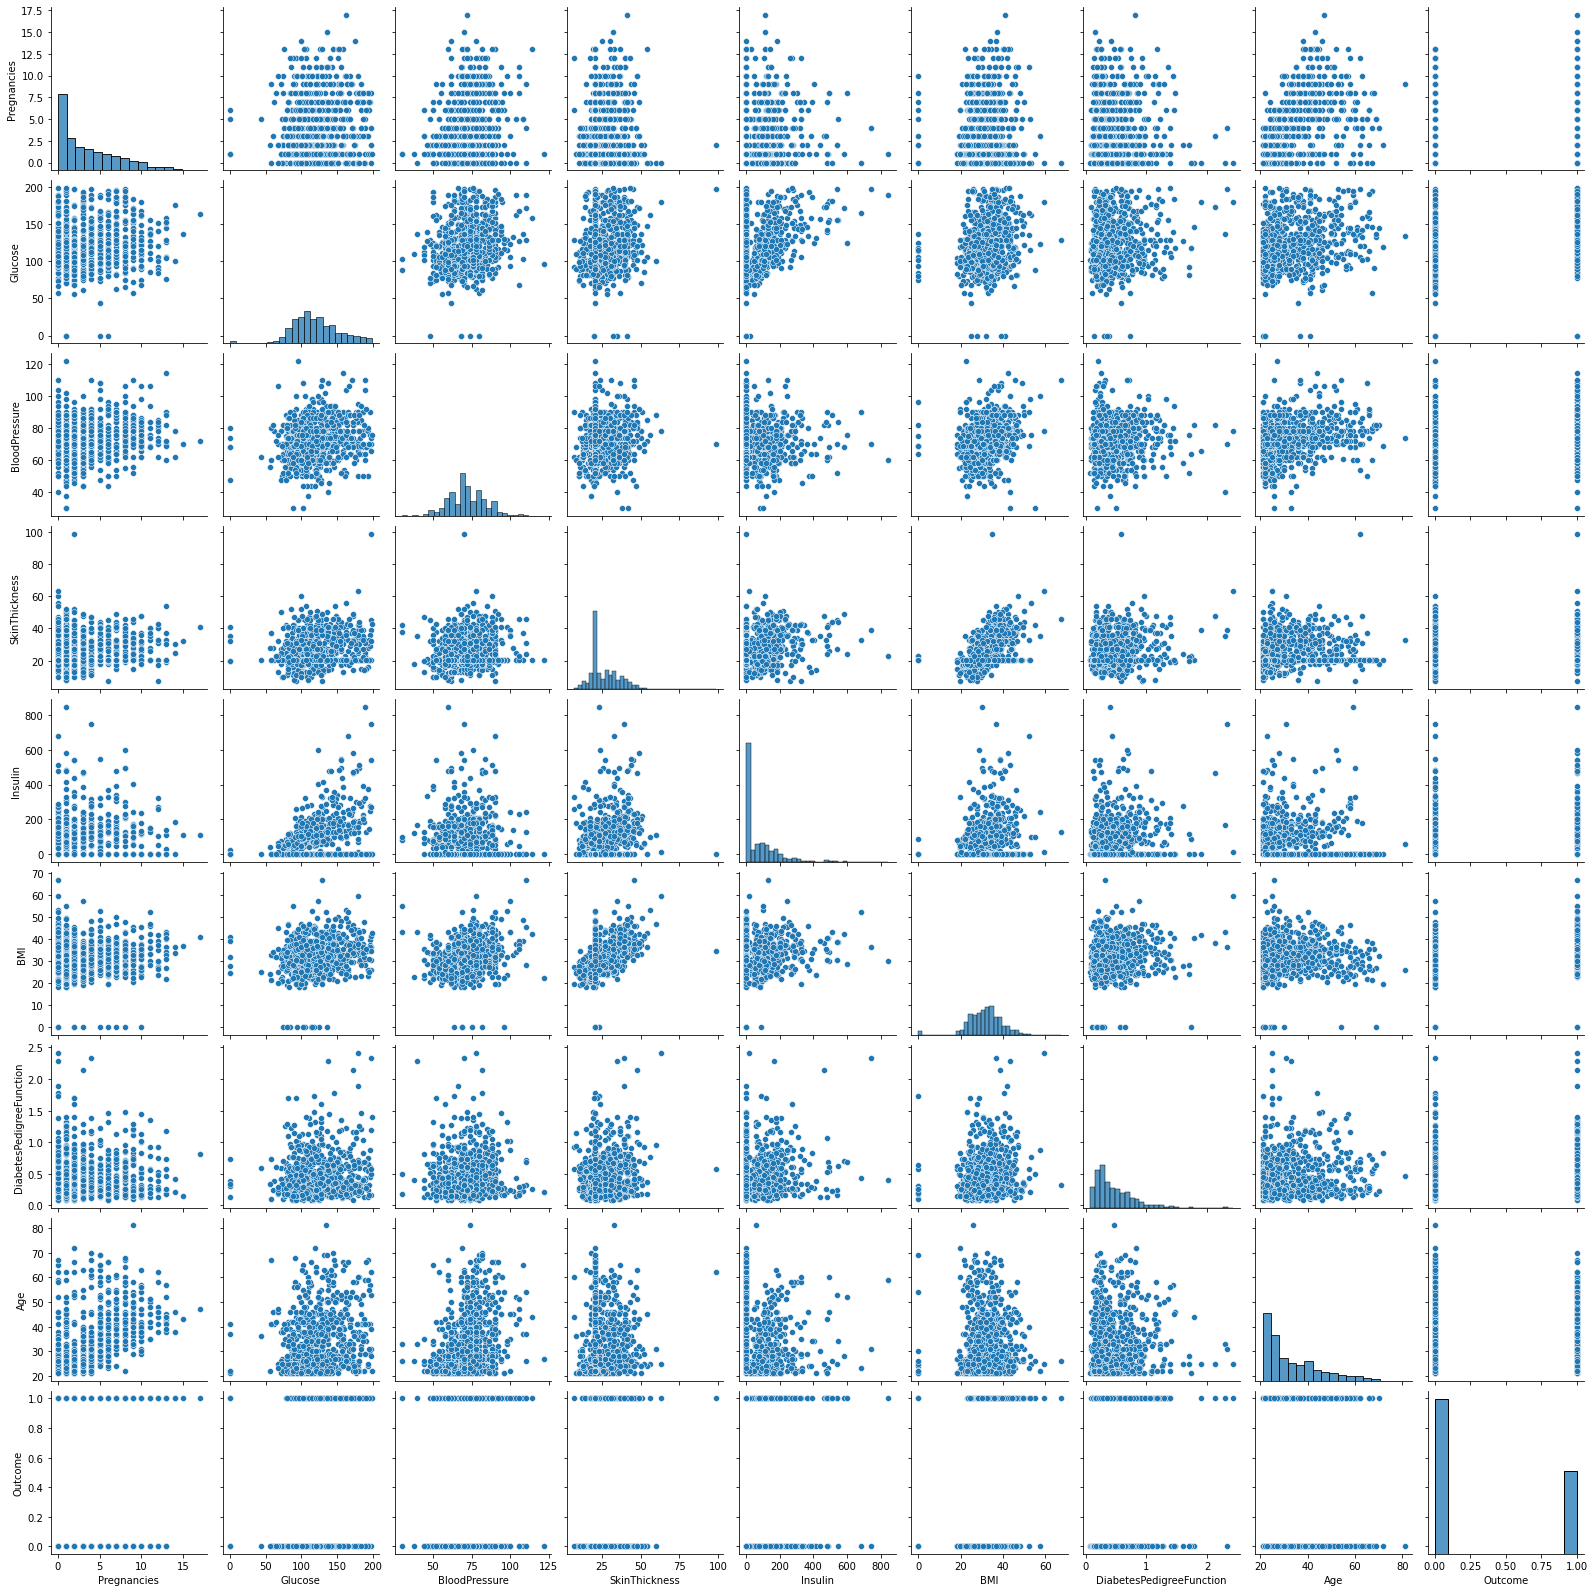

In [ ]:
sns.pairplot(copy_data)

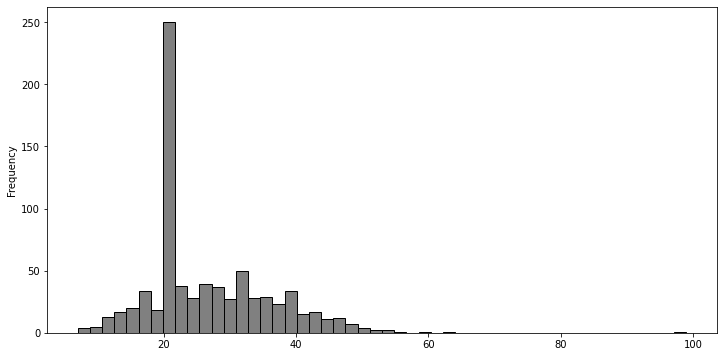

In [ ]:
copy_data['SkinThickness'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black')


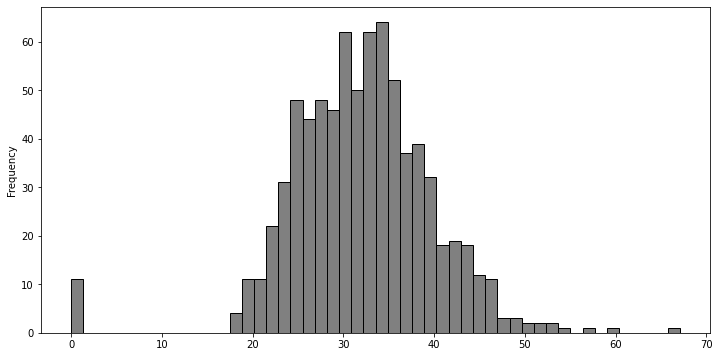

In [ ]:
copy_data['BMI'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black')

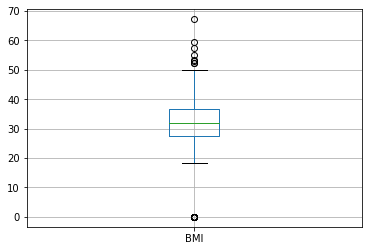

In [ ]:
copy_data.boxplot('BMI')

In [ ]:
data_copy = copy_data[copy_data.BMI >= 10]

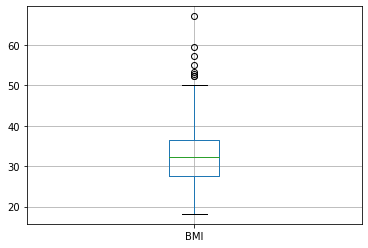

In [ ]:
data_copy.boxplot('BMI')

In [ ]:
data_copy['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

In [ ]:
data_copy['Pregnancies'].nunique()

17

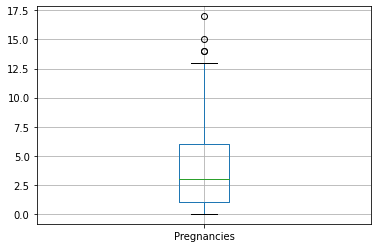

In [ ]:
data_copy.boxplot('Pregnancies')

In [ ]:
data_copy[(data_copy['Pregnancies'] == 17)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
159,17,163,72.0,41.0,114,40.9,0.817,47,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


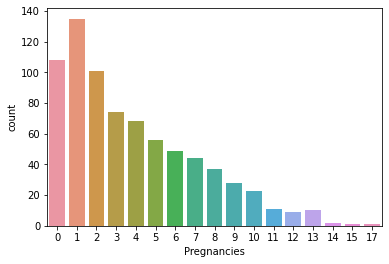

In [ ]:
sns.countplot(data_copy.Pregnancies)

In [ ]:
data_copy.shape

(757, 9)

In [ ]:
data_copy['Outcome'].value_counts()

0    491
1    266
Name: Outcome, dtype: int64

Normalizing data


In [ ]:
Y = data_copy.Outcome
x = data_copy.drop('Outcome', axis = 1)
columns = x.columns

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
X = scaler.fit_transform(x)
data_x = pd.DataFrame(X, columns = columns)

Train and test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_x, Y, test_size = 0.15, random_state = 45)

SMOTE (Synthetic Minority Oversampling Technique)

---



In [ ]:
data_copy['Outcome'].value_counts()

0    491
1    266
Name: Outcome, dtype: int64

In [ ]:
unique, count = np.unique(y_train, return_counts = True)
y_train_value_count = {k:v for (k,v) in zip(unique,count)}
y_train_value_count

{0: 419, 1: 224}

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE
print(imblearn.__version__)

0.4.3


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
sm = SMOTE(random_state = 12, ratio = 1.0)
x_train, y_train = sm.fit_sample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
unique, count = np.unique(y_train, return_counts = True)
y_train_value_count = {k:v for (k,v) in zip(unique,count)}
y_train_value_count

{0: 419, 1: 419}

Hyperparameter Tuning


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
x_train.shape

(838, 8)

In [ ]:
y_train.shape

(838,)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


In [ ]:
#Testing precision, recall and F1 score
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, classification_report
print(f1_score(y_test, y_pred, average='macro'))
print(precision_score(y_test, y_pred, average='macro'))
print(recall_score(y_test, y_pred, average='macro'))

0.7224025974025975
0.7196291560102301
0.7271825396825397


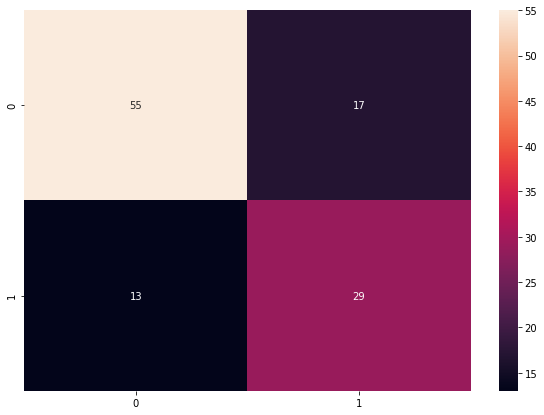

In [ ]:
LogR_CM = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(LogR_CM, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.76      0.79        72
           1       0.63      0.69      0.66        42

    accuracy                           0.74       114
   macro avg       0.72      0.73      0.72       114
weighted avg       0.74      0.74      0.74       114



Support Vector Machines


In [ ]:
from sklearn import svm
supportVM = svm.SVC()
supportVM.fit(x_train, y_train)
y_pred = supportVM.predict(x_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(supportVM.score(x_test, y_test)))

Accuracy of SVM classifier on test set: 0.76


              precision    recall  f1-score   support

           0       0.87      0.74      0.80        72
           1       0.64      0.81      0.72        42

    accuracy                           0.76       114
   macro avg       0.76      0.77      0.76       114
weighted avg       0.79      0.76      0.77       114



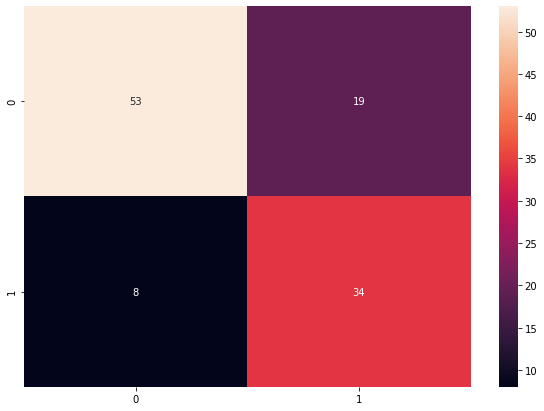

In [ ]:
SVM_CM = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(SVM_CM, annot=True)
print(classification_report(y_test, y_pred))

In [ ]:
supportVM

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
score = cross_val_score(supportVM, x_test, y_test, cv = 5, scoring = 'f1_macro')
score.mean()

0.7143784488211302

Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dcc = DecisionTreeClassifier()
dcc.fit(x_train, y_train)
y_pred = dcc.predict(x_test)
print('Accuracy of decision tree classifier on test set: {:.2f}'.format(dcc.score(x_test, y_test)))

Accuracy of decision tree classifier on test set: 0.67


              precision    recall  f1-score   support

           0       0.72      0.78      0.75        72
           1       0.56      0.48      0.51        42

    accuracy                           0.67       114
   macro avg       0.64      0.63      0.63       114
weighted avg       0.66      0.67      0.66       114



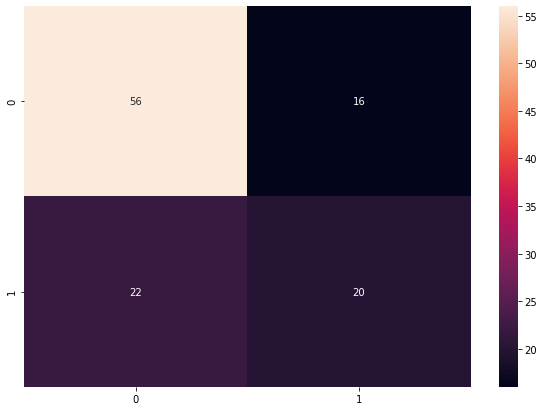

In [ ]:
DT_CM = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(DT_CM, annot=True)
print(classification_report(y_test, y_pred))

In [ ]:
dcc

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Naive Bayes

Guassian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
Nbc = GaussianNB()
Nbc.fit(x_train, y_train)
y_pred = Nbc.predict(x_test)
print('Accuracy of gaussian naive bayes classifier on test set: {:.2f}'.format(Nbc.score(x_test, y_test)))

Accuracy of gaussian naive bayes classifier on test set: 0.75


              precision    recall  f1-score   support

           0       0.81      0.81      0.81        72
           1       0.67      0.67      0.67        42

    accuracy                           0.75       114
   macro avg       0.74      0.74      0.74       114
weighted avg       0.75      0.75      0.75       114



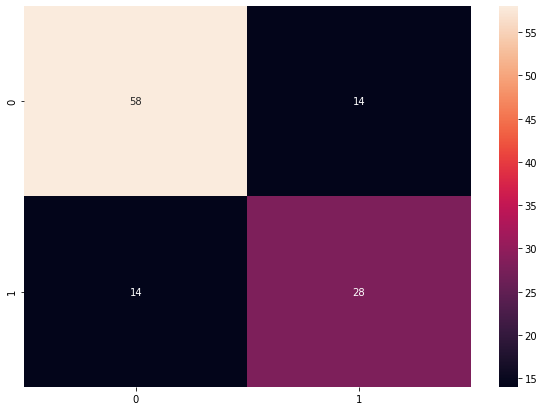

In [ ]:
NB1_CM = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(NB1_CM, annot=True)
print(classification_report(y_test, y_pred))

In [ ]:
score = cross_val_score(Nbc, x_test, y_test, cv = 5, scoring = 'f1_macro')
score.mean()

0.6749978596454256

In [ ]:
Nbc

GaussianNB(priors=None, var_smoothing=1e-09)

Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
NBc = MultinomialNB()
NBc.fit(x_train, y_train)
y_pred = NBc.predict(x_test)
print('Accuracy of multinomial naive bayes classifier on test set: {:.2f}'.format(NBc.score(x_test, y_test)))

ValueError: ignored

Bernoulli Naive Bayes


In [ ]:
from sklearn.naive_bayes import BernoulliNB
NBC = BernoulliNB()
NBC.fit(x_train, y_train)
y_pred = NBC.predict(x_test)
print('Accuracy of bernoulli naive bayes classifier on test set: {:.2f}'.format(NBC.score(x_test, y_test)))

Accuracy of bernoulli naive bayes classifier on test set: 0.72


              precision    recall  f1-score   support

           0       0.81      0.76      0.79        72
           1       0.63      0.69      0.66        42

    accuracy                           0.74       114
   macro avg       0.72      0.73      0.72       114
weighted avg       0.74      0.74      0.74       114



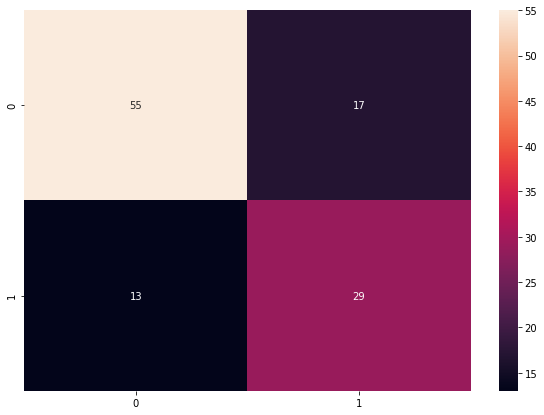

In [ ]:
NB3_CM = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(NB3_CM, annot=True)
print(classification_report(y_test, y_pred))

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
y_pred = RFC.predict(x_test)
print('Accuracy of random forrest classifier on test set: {:.2f}'.format(RFC.score(x_test, y_test)))

Accuracy of random forrest classifier on test set: 0.78


              precision    recall  f1-score   support

           0       0.81      0.76      0.79        72
           1       0.63      0.69      0.66        42

    accuracy                           0.74       114
   macro avg       0.72      0.73      0.72       114
weighted avg       0.74      0.74      0.74       114



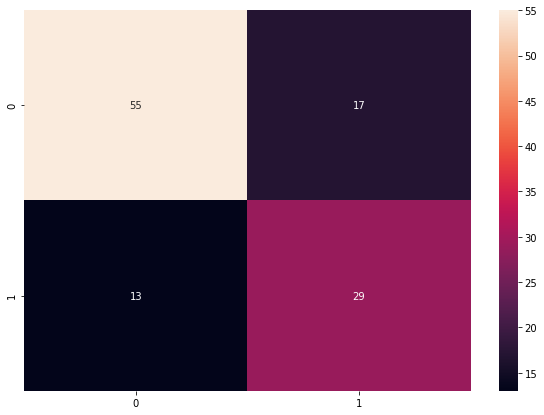

In [ ]:
RFC_CM = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(RFC_CM, annot=True)
print(classification_report(y_test, y_pred))

Usinf Random Search Cross Validation to find the best parameters for GridSearch CV

In [ ]:
score = cross_val_score(RFC, x_test, y_test, cv = 5, scoring = 'f1_macro')
score.mean()

0.773509840532431

In [ ]:
RFC

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 18.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [ ]:
def evaluate(model, x_test, y_test):
    predictions = model.predict(x_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / x_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

In [ ]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)

Model Performance
Average Error: 0.3386 degrees.
Accuracy = -inf%.


In [ ]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test)
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.3334 degrees.
Accuracy = -inf%.
Improvement of nan%.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


Using GridSearch CV


In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_features': ['auto', 'sqrt'],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)


In [ ]:
grid_search.fit(x_train, y_train)
grid_search.best_params_

NameError: ignored

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test, y_test)

Model Performance
Average Error: 0.3403 degrees.


TypeError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rf = RandomForestClassifier(max_features='sqrt',n_estimators=400)
Rf.fit(x_train, y_train)
y_pred = Rf.predict(x_test)
print('Accuracy of random forrest classifier on test set: {:.2f}'.format(Rf.score(x_test, y_test)))

Accuracy of random forrest classifier on test set: 0.76


In [ ]:
score = cross_val_score(Rf, x_test, y_test, cv = 5, scoring = 'f1_macro')
score.mean()

0.7722003167229071

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        72
           1       0.67      0.71      0.69        42

    accuracy                           0.76       114
   macro avg       0.75      0.75      0.75       114
weighted avg       0.77      0.76      0.76       114



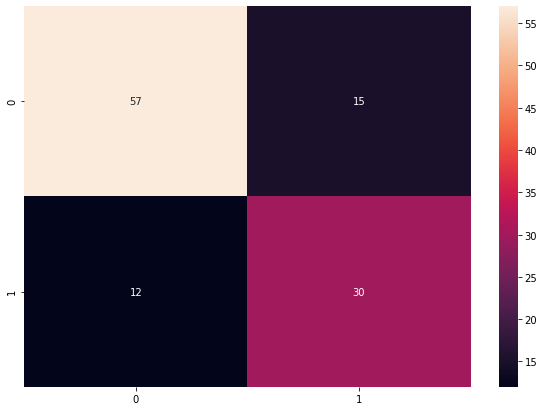

In [ ]:
Rf_CM = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.heatmap(Rf_CM, annot=True)
print(classification_report(y_test, y_pred))

Saving The Final Model


In [ ]:
import pickle
# Save the trained model as a pickle string.
saved_model = pickle.dumps(Rf)
# Load the pickled model
Rf_from_pickle = pickle.loads(saved_model)
# Use the loaded pickled model to make predictions
Rf_from_pickle.predict(x_test)

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1])

In [ ]:
from sklearn.externals import joblib
# Save the model as a pickle in a file
joblib.dump(Rf, 'Diabetes_Detection.pkl')
# Load the model from the file
Rf_from_joblib = joblib.load('Diabetes_Detection.pkl')
# Use the loaded model to make predictions
Rf_from_joblib.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1])

In [ ]:
data_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.0,35.000000,0,33.6,0.627,50,1
1,1,85,66.0,29.000000,0,26.6,0.351,31,0
2,8,183,64.0,20.536458,0,23.3,0.672,32,1
3,1,89,66.0,23.000000,94,28.1,0.167,21,0
4,0,137,40.0,35.000000,168,43.1,2.288,33,1


Testing the Model


In [ ]:
import socket
print(socket.gethostbyname(socket.gethostname()))

172.28.0.2


In [ ]:
!pip install flask-ngrok

In [ ]:
from flask import Flask
from flask_ngrok import run_with_ngrok
app = Flask(__name__)
run_with_ngrok(app)   
  
@app.route("/")
def home():
    dict1 = {'Pregnancies':0, 'Glucose':50, 'BloodPressure':65, 'SkinThickness':1, 'Insulin':0, 'BMI':18.4, 'DiabetesPedigreeFunction':0, 'Age':2}
    result = predictions(dict1)
    return str(result[0])
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


OSError: ignored

In [ ]:
from flask import Flask, jsonify, make_response, request
from flask_ngrok import run_with_ngrok
import sklearn
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
import pandas as pd
import threading

def load_pkl():
    Rf_from_joblib = joblib.load('Diabetes_Detection.pkl')
    return Rf_from_joblib

def predictions(dictionary):
    Rf = load_pkl()
    data_list = [[dictionary[key] for key in dictionary.keys()]]
    dataset = pd.DataFrame(data_list, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age'])
    scaler = StandardScaler()
    X = scaler.fit_transform(dataset)
    columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction', 'Age']
    data_x = pd.DataFrame(X, columns=columns)
    y_pred = Rf.predict(data_x)
    return y_pred

app = Flask(__name__)
run_with_ngrok(app)

@app.route("/")
def home(dictt):
    result = predictions(dictt)
    return result

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
dict1 = {'Pregnancies':0, 'Glucose':50, 'BloodPressure':65, 'SkinThickness':1, 'Insulin':0, 'BMI':18.4, 'DiabetesPedigreeFunction':0, 'Age':2}
print(home(dict1))

[1]


In [ ]:
from flask import Flask
from flask import Flask, jsonify, make_response, request
from flask_ngrok import run_with_ngrok
import threading

app = Flask(__name__)
run_with_ngrok(app)   
  
@app.route("/", methods = ['POST'])
def home():
    dict1 = request.json#['text']
    print(dict1)
    #dict1 = {'Pregnancies':0, 'Glucose':50, 'BloodPressure':65, 'SkinThickness':1, 'Insulin':0, 'BMI':18.4, 'DiabetesPedigreeFunction':0, 'Age':2}
    result = predictions(dict1)
    return str(result[0])
#app.run()
t_webApp = threading.Thread(target = app.run)
t_webApp.start()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [ ]:
import requests
import json


headers = {'Content-type':'application/json'} 
dict1 = {'Pregnancies':0, 'Glucose':50, 'BloodPressure':125, 'SkinThickness':10, 'Insulin':0, 'BMI':18.4, 'DiabetesPedigreeFunction':0, 'Age':22}

req=requests.post('http://127.0.0.1:5000/',data=json.dumps(dict1), headers=headers)
print(req.status_code)

{'Pregnancies': 0, 'Glucose': 50, 'BloodPressure': 125, 'SkinThickness': 10, 'Insulin': 0, 'BMI': 18.4, 'DiabetesPedigreeFunction': 0, 'Age': 22}


127.0.0.1 - - [28/Apr/2021 10:12:25] "POST / HTTP/1.1" 200 -


200


In [ ]:
req.text

'1'